In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoded)
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss #+ constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)  

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





Using TensorFlow backend.


In [3]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 0s - loss: 124.2516 - val_loss: 103.3070
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 101.3793 - val_loss: 101.0661
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 100.3048 - val_loss: 102.1563
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 100.0191 - val_loss: 100.4810
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 99.8653 - val_loss: 100.5047
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 99.7816 - val_loss: 100.3266
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 99.6961 - val_loss: 100.2359
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 99.6585 - val_loss: 100.2603
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 99.5782 - val_loss: 100.4057
Epoch 10/50
15000/15000 [==============================] - 0s - l

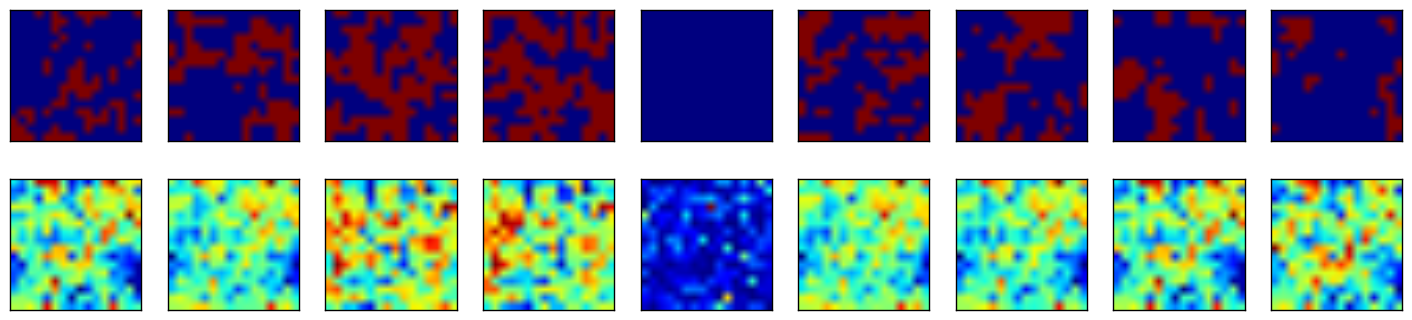

In [4]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

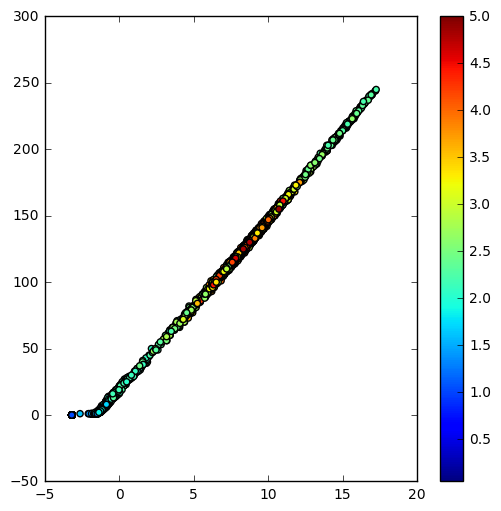

In [5]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, encoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( x_test_encoded[:, 0] ,y_test, c=T_test)  
plt.colorbar()  
plt.show()  



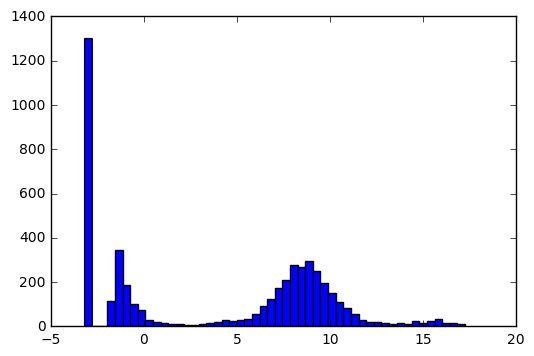

In [6]:
plt.hist(x_test_encoded[:,0],50)
plt.show()

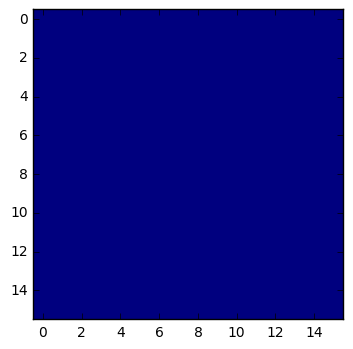

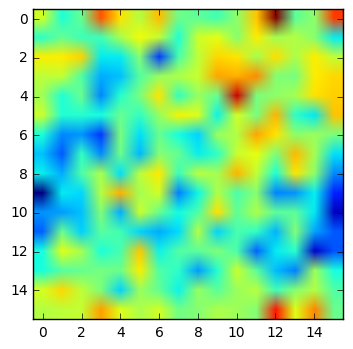

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[ 0.41855344  0.40441075  0.40998736  0.43257755  0.42290026  0.41605762
   0.42540932  0.41051835  0.40946949  0.40729889  0.41307071  0.42455795
   0.44443473  0.40935302  0.41300228  0.43464488]
 [ 0.4057433   0.41004089  0.4066954   0.40698022  0.41519952  0.42105332
   0.41724351  0.40468147  0.41832078  0.41997671  0.41260257  0.42199349
   0.41466516  0.41623887  0.41244978  0.40244937]
 [ 0.42166191  0.42200515  0.42384619  0.

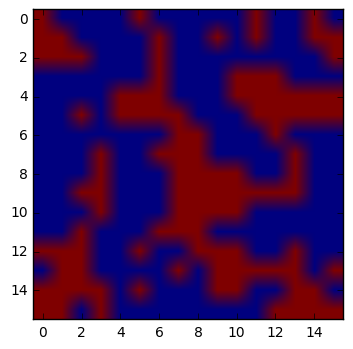

[[1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1]
 [1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1]
 [0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0]
 [0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1]]


In [7]:
ss = 0
plt.imshow(np.reshape(np.round(decoded_imgs[ss]),[16,16]))
plt.show()
plt.imshow(np.reshape((decoded_imgs[ss]),[16,16]))
plt.show()
print(np.reshape((np.round(decoded_imgs[ss]).astype(int)),[16,16]))
print(np.reshape(((decoded_imgs[ss]).astype(float)),[16,16]))
plt.imshow(x_test[ss].reshape((16,16)))
plt.show()
print(x_test[ss].reshape((16,16)))

In [8]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [9]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 0s - loss: 180868.9529 - val_loss: 21183.0593
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 11348.0034 - val_loss: 4186.1171
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 6636.1315 - val_loss: 1402.7337
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 5328.1016 - val_loss: 3763.9002
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 3823.3816 - val_loss: 4452.4456
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 2965.5221 - val_loss: -795.3934
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 2499.6946 - val_loss: 1465.5178
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 1836.2930 - val_loss: -911.3173
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 1445.4257 - val_loss: 2072.0644
Epoch 10/50
15000/15000 [=============

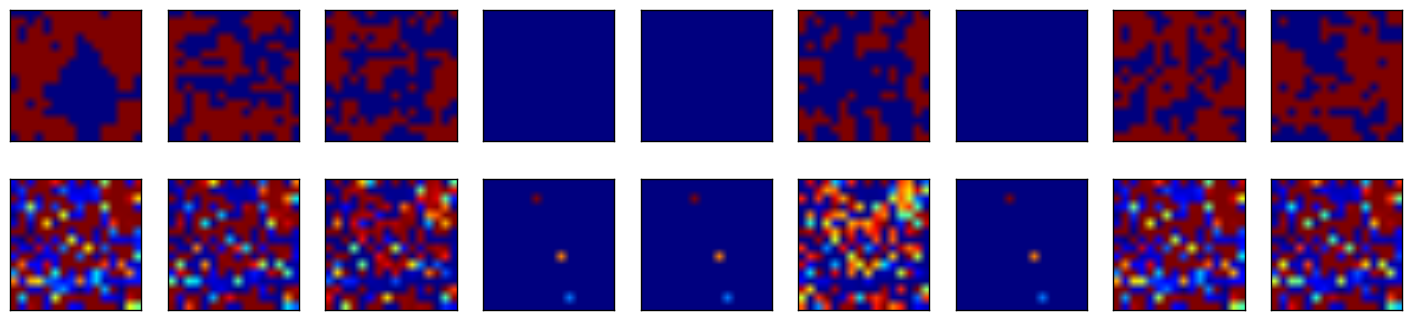

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

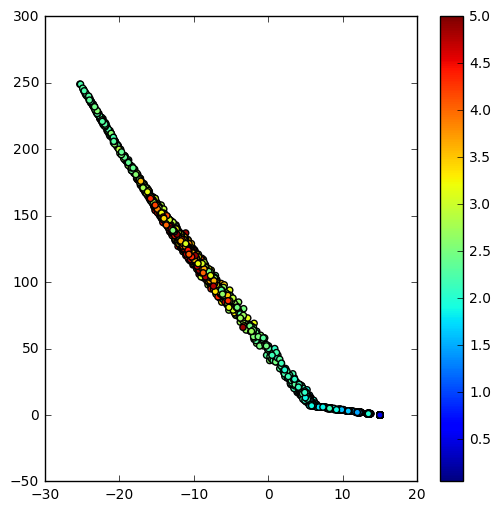

In [11]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, encoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( x_test_encoded[:, 0] ,y_test, c=T_test)  
plt.colorbar()  
plt.show()  



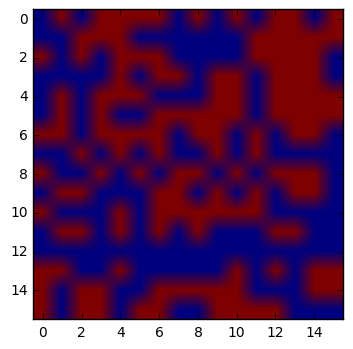

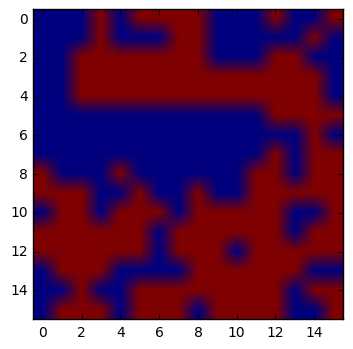

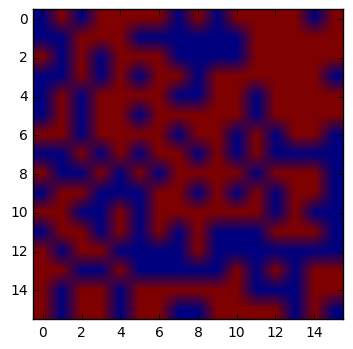

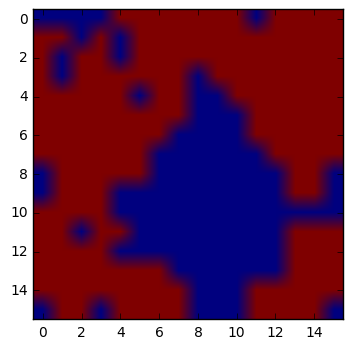

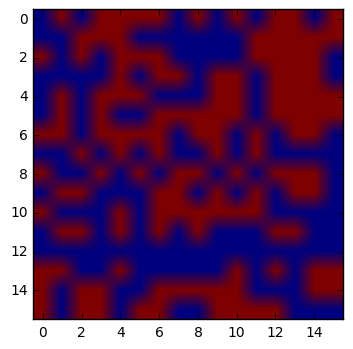

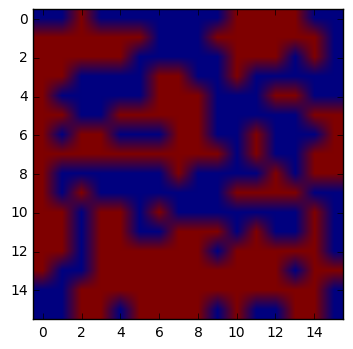

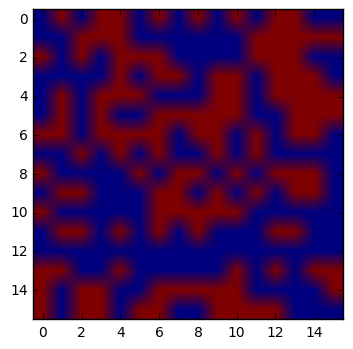

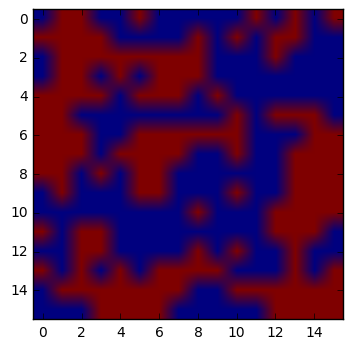

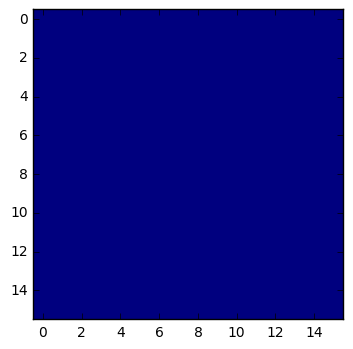

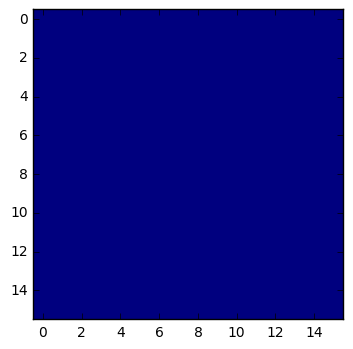

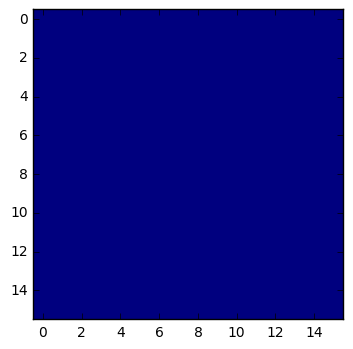

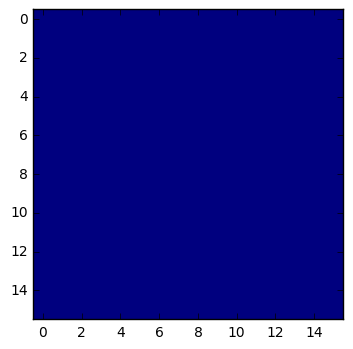

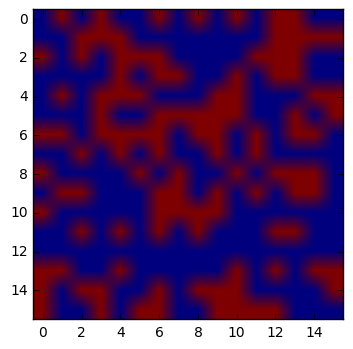

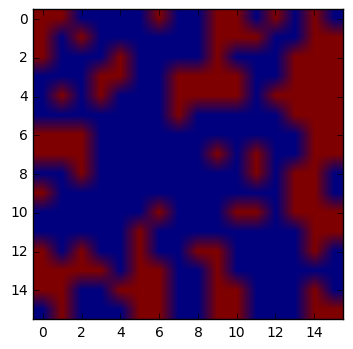

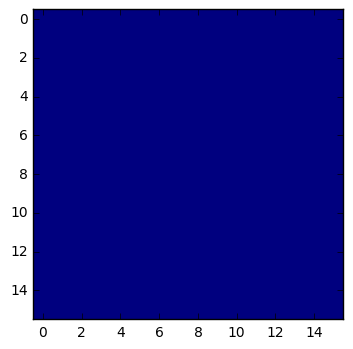

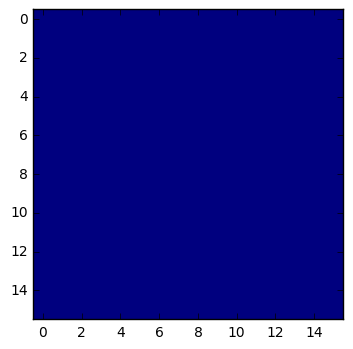

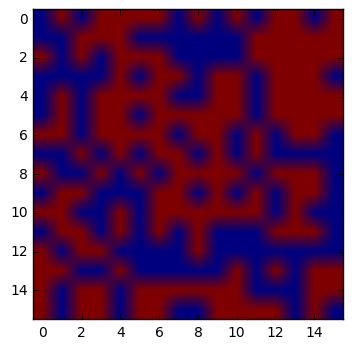

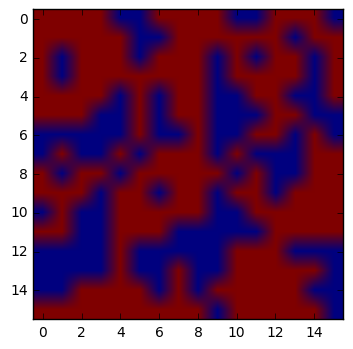

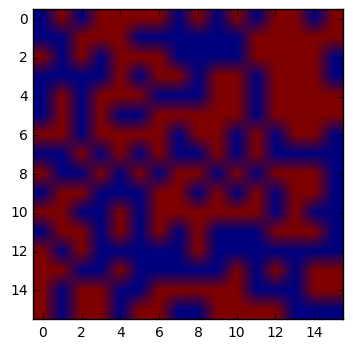

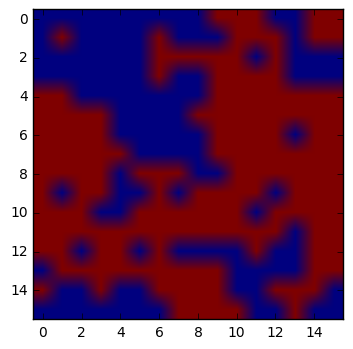

In [12]:
for ss in range(10):
    plt.imshow(np.reshape(np.round(decoded_imgs[ss]),[16,16]))
    plt.show()
    #plt.imshow(np.reshape((decoded_imgs[ss]),[16,16]))
    #plt.show()
    #print(np.reshape((np.round(decoded_imgs[ss]).astype(int)),[16,16]))
    #print(np.reshape(((decoded_imgs[ss]).astype(float)),[16,16]))
    plt.imshow(x_test[ss].reshape((16,16)))
    plt.show()
    #print(x_test[ss].reshape((16,16)))

In [13]:
try0 = [[1,1,1]],[[4,4,4]]
try0 = np.asarray(try0)

In [14]:
np.sum(try0,axis=-1)

array([[ 3],
       [12]])

In [15]:
np.sum(try0,axis=1)

array([[1, 1, 1],
       [4, 4, 4]])

In [16]:
np.sum(try0,axis=0)

array([[5, 5, 5]])

In [17]:
np.sum(try0)

15

In [18]:
#larger scale:

In [22]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
augment_scale = 4

#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  


decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(augment_scale*original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)/augment_scale))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [23]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 1s - loss: 236688.4032 - val_loss: 3768.3337
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 3242.6215 - val_loss: -5441.7730
Epoch 3/50
15000/15000 [==============================] - 0s - loss: -1590.2633 - val_loss: -6850.3757
Epoch 4/50
15000/15000 [==============================] - 0s - loss: -3572.2456 - val_loss: -3632.1740
Epoch 5/50
15000/15000 [==============================] - 0s - loss: -4943.7625 - val_loss: -4698.8151
Epoch 6/50
15000/15000 [==============================] - 0s - loss: -5557.3330 - val_loss: -6580.5955
Epoch 7/50
15000/15000 [==============================] - 0s - loss: -6378.4791 - val_loss: -10073.4667
Epoch 8/50
15000/15000 [==============================] - 0s - loss: -6702.9786 - val_loss: -8220.1894
Epoch 9/50
15000/15000 [==============================] - 0s - loss: -7425.1479 - val_loss: -8428.6942
Epoch 10/50
15000/15000 

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


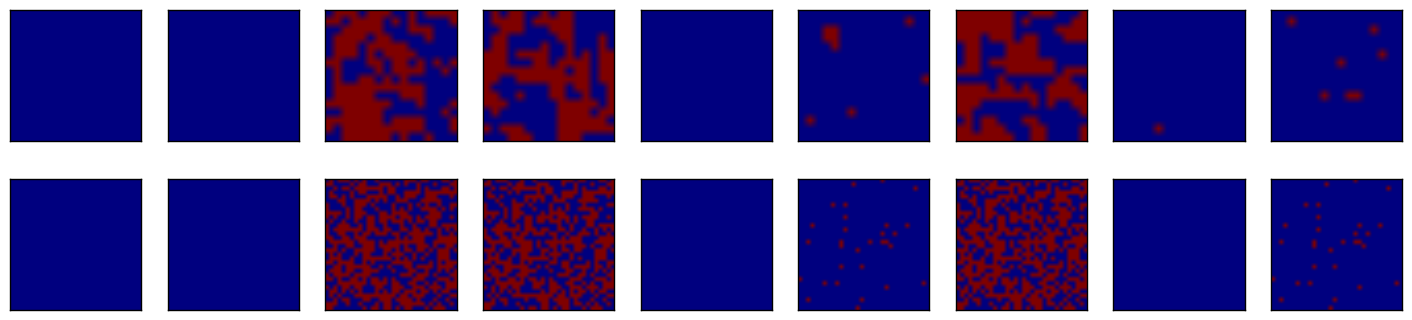

In [25]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16*np.sqrt(augment_scale),16*np.sqrt(augment_scale))))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

24.7139


/Users/sunhop/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


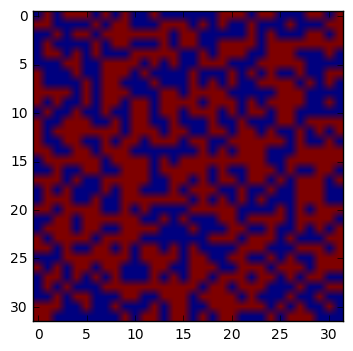

22


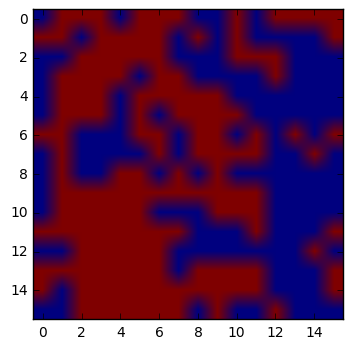

7.05875


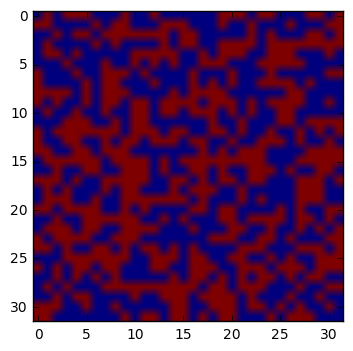

8


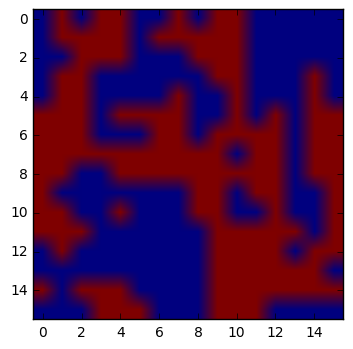

15.7102


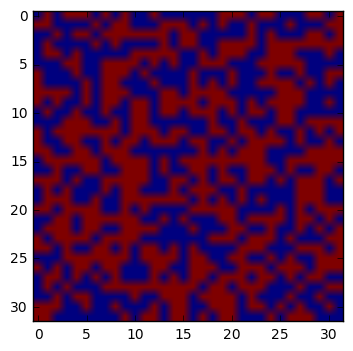

22


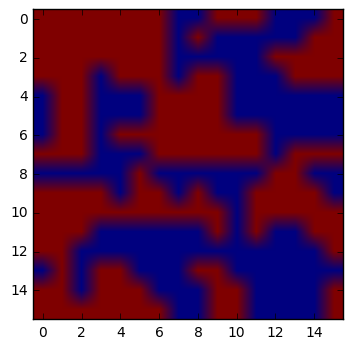

In [38]:
for ss in [3,4,7]:
    plt.imshow(np.reshape(np.round(decoded_imgs[ss]),[16*np.sqrt(augment_scale),16*np.sqrt(augment_scale)]))
    print((np.sum((decoded_imgs[ss]*2-1)/4,axis=-1)))
    plt.show()
    #plt.imshow(np.reshape((decoded_imgs[ss]),[16,16]))
    #plt.show()
    #print(np.reshape((np.round(decoded_imgs[ss]).astype(int)),[16,16]))
    #print(np.reshape(((decoded_imgs[ss]).astype(float)),[16,16]))
    print((np.sum((x_test[ss]*2-1),axis=-1)))
    plt.imshow(x_test[ss].reshape((16,16)))
    plt.show()
    #print(x_test[ss].reshape((16,16)))

In [39]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
augment_scale = 25

#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  


decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(augment_scale*original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)/augment_scale))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [40]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 3s - loss: 143062.8809 - val_loss: -54130.3838
Epoch 2/50
15000/15000 [==============================] - 3s - loss: -57277.9941 - val_loss: -69345.8372
Epoch 3/50
15000/15000 [==============================] - 3s - loss: -71514.0799 - val_loss: -82554.2866
Epoch 4/50
15000/15000 [==============================] - 3s - loss: -99737.6228 - val_loss: -115500.6498
Epoch 5/50
15000/15000 [==============================] - 3s - loss: -120273.9722 - val_loss: -126365.3430
Epoch 6/50
15000/15000 [==============================] - 3s - loss: -129397.5738 - val_loss: -133762.5450
Epoch 7/50
15000/15000 [==============================] - 3s - loss: -135107.4403 - val_loss: -137764.9862
Epoch 8/50
15000/15000 [==============================] - 3s - loss: -138312.2695 - val_loss: -139950.5355
Epoch 9/50
15000/15000 [==============================] - 3s - loss: -140583.4403 - val_loss: -137442.

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


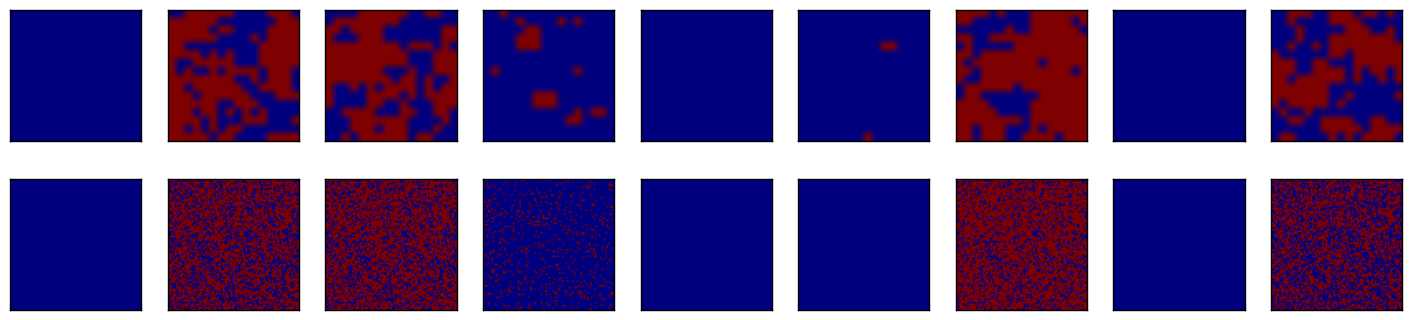

In [41]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test,batch_size=100)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(np.round(x_test[i].reshape(16, 16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow(np.round(decoded_imgs[i].reshape(16*np.sqrt(augment_scale),16*np.sqrt(augment_scale))))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/Users/sunhop/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


55.5047


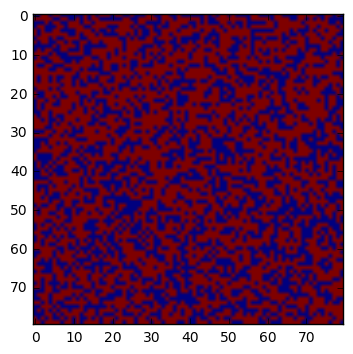

60


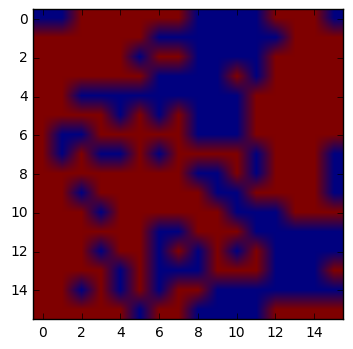

63.9467


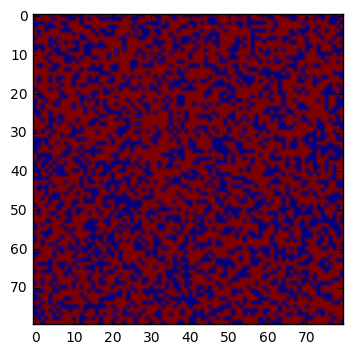

46


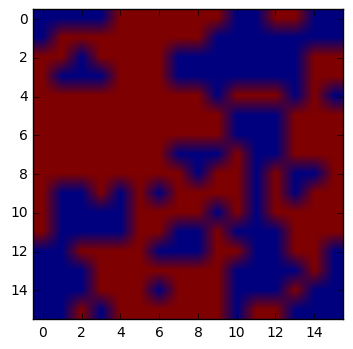

-207.859


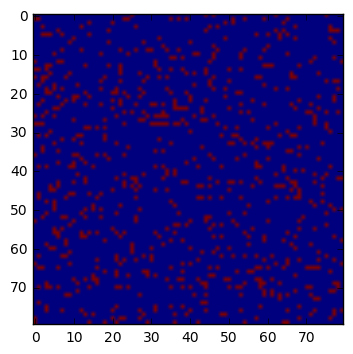

-206


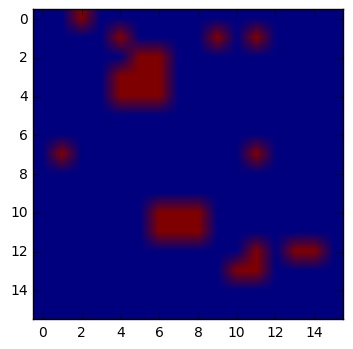

109.014


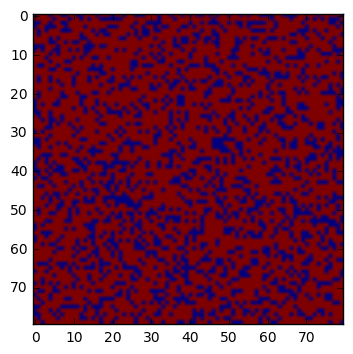

126


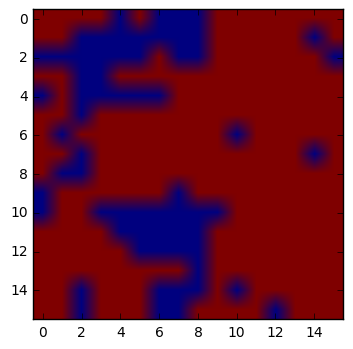

13.8551


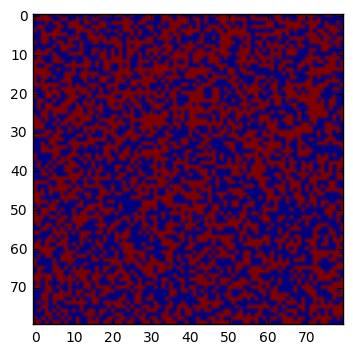

6


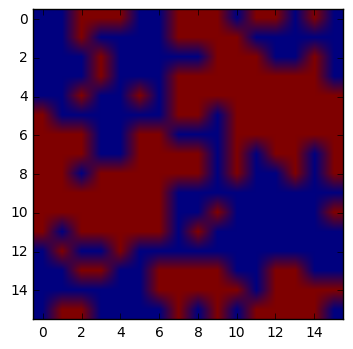

In [43]:
for ss in [2,3,4,7,9]:
    plt.imshow(np.reshape(np.round(decoded_imgs[ss]),[16*np.sqrt(augment_scale),16*np.sqrt(augment_scale)]))
    print((np.sum((decoded_imgs[ss]*2-1)/(augment_scale),axis=-1)))
    plt.show()
    #plt.imshow(np.reshape((decoded_imgs[ss]),[16,16]))
    #plt.show()
    #print(np.reshape((np.round(decoded_imgs[ss]).astype(int)),[16,16]))
    #print(np.reshape(((decoded_imgs[ss]).astype(float)),[16,16]))
    print((np.sum((x_test[ss]*2-1),axis=-1)))
    plt.imshow(x_test[ss].reshape((16,16)))
    plt.show()
    #print(x_test[ss].reshape((16,16)))